# New York Times API Project

Import necessary libraries

In [1]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from config import API_KEY

## Fetch Data


For testing I used January 2024-Feburary 2024

In [2]:
import requests

from datetime  import datetime


#i created this function with some help from chatgpt

def get_articles(api_key):
#this allows the user to fetch data from a certain time period
#i did not know how to make it so the user can change the year
  year = int(input("Enter the year (YYYY) : "))
  month_start = int(input("Enter the month you would like to start with  as a number(M): "))
  month_end = int(input("How many months of data would like?:"))

  #empty list specifically for technology articles
  technology_articles = []
  api_key = API_KEY
#goes through the range the the month you start from until you it to stop
  for month in range(month_start, month_end + 1):

    #api_key = API_KEY

    url = f'https://api.nytimes.com/svc/archive/v1/{year}/{month}.json'
    params = {'api-key': API_KEY}

  #get request for the data
    response = requests.get(url, params=params)

  #this converts the json data to a list
    data = response.json()


  #this goes through the result and only gets sections that have to do with technology
    for article in data['response']['docs']:
        if 'section_name' in article and 'technology' in article['section_name'].lower():
            technology_articles.append(article)

  return technology_articles

technology_articles = get_articles(API_KEY)


Enter the year (YYYY) : 2024
Enter the month you would like to start with (M): 1
How many months of data would like?:2


In [3]:
#turn list to dataframe
df = pd.DataFrame(technology_articles)

# Keyword Analysis




In [ ]:

from collections import Counter

keywords = []

#this will use the technology articles list instead of the df, i did not know how
#to do it with the df
#i received help on this

for article in technology_articles:

    # makes sure 'keywords' exists and is a list before running
    if 'keywords' in article and isinstance(article['keywords'], list):
        for keyword in article['keywords']:
            # Ensure 'name' and 'value' exist in the keyword dict
            if 'name' in keyword and 'value' in keyword and keyword['name'] == 'subject':
                keywords.append(keyword['value'])

# Count the occurrences of each keyword
keyword_counts = Counter(keywords)

print(keyword_counts)

Counter({'Computers and the Internet': 77, 'Artificial Intelligence': 41, 'Social Media': 23, 'Regulation and Deregulation of Industry': 16, 'Mobile Applications': 15, 'ChatGPT': 11, 'Layoffs and Job Reductions': 11, 'iPhone': 10, 'Start-ups': 10, 'Smartphones': 8, 'Rumors and Misinformation': 8, 'Video Recordings, Downloads and Streaming': 8, 'United States Politics and Government': 8, 'Computer Chips': 7, 'Headphones and Headsets': 7, 'Company Reports': 7, 'Antitrust Laws and Competition Issues': 6, 'Labor and Jobs': 6, 'News and News Media': 6, 'Suits and Litigation (Civil)': 6, 'Online Advertising': 6, 'Wearable Computing': 6, 'Virtual Reality (Computers)': 6, 'Law and Legislation': 6, 'Politics and Government': 5, 'Driverless and Semiautonomous Vehicles': 5, 'Software': 5, 'Cloud Computing': 5, 'Text Messaging': 4, 'Copyrights and Copyright Violations': 4, 'United States International Relations': 4, 'Virtual Currency': 4, 'Television': 4, 'Venture Capital': 4, 'Two Thousand Twenty

In [ ]:
#makes list to df
df_keywords = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

df_keywords.reset_index(drop=True, inplace=True)
#sorts it from greatest to least
df_keywords_sorted = df_keywords.sort_values(by='Count', ascending=False).head(10)

# Plot data

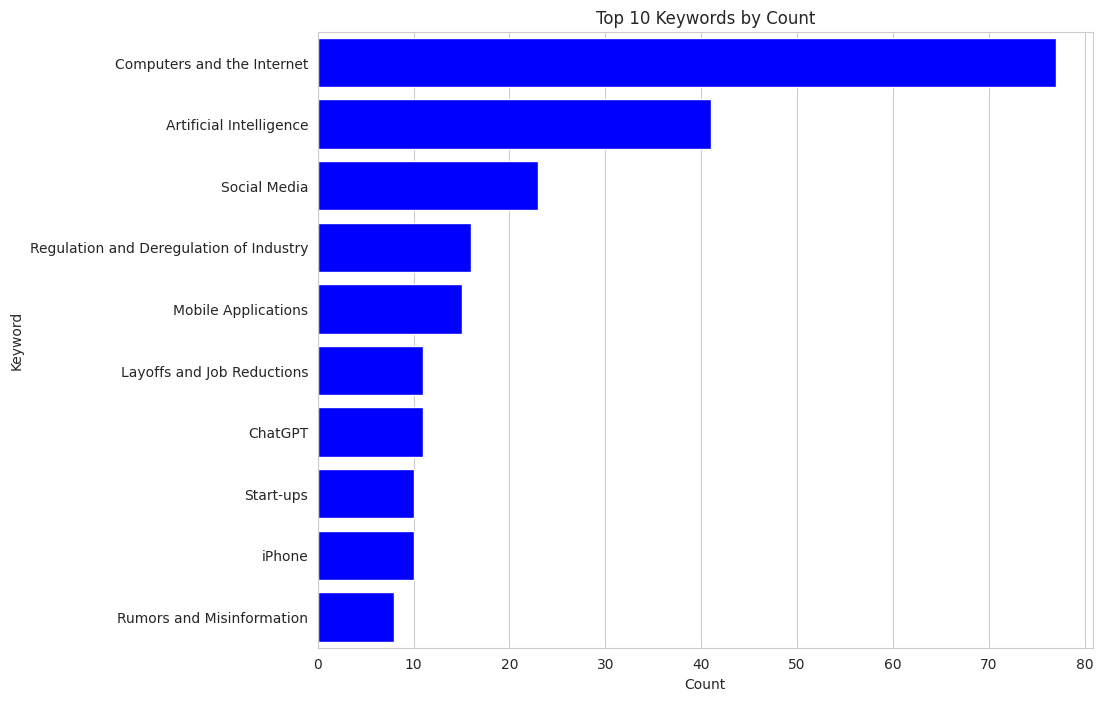

In [ ]:
#visualize the data with a bar chart
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.set_palette("bright")

bar_plot = sns.barplot(data=df_keywords_sorted.head(10),
                       x='Count', y='Keyword',
                       color='blue',
                       saturation=1,
)

plt.title('Top 10 Keywords by Count')
plt.xlabel('Count')
plt.ylabel('Keyword')

# Show the plot
plt.show()


# Published Articles

In [21]:
import plotly.express as px

In [22]:
#change the data type of the pub_date column
df['pub_date'] = pd.to_datetime(df['pub_date'])

In [23]:
#extract the date only without the time
df['date_only'] = df['pub_date'].dt.date

pub_count = df.groupby('date_only')['web_url'].count().reset_index()

pub_count.sort_values(by='web_url', ascending=False).head(10)

,date_only,web_url
35,2024-02-28,7
19,2024-02-01,7
5,2024-01-10,6
14,2024-01-25,5
32,2024-02-22,5
6,2024-01-11,5
17,2024-01-30,5
31,2024-02-21,4
26,2024-02-14,4
18,2024-01-31,4


In [26]:
# i used plotly instead of seaborn because the chart is interactive so you can hover over dates to see the trend better

fig = px.line(pub_count, x='date_only', y='web_url', title='Number of Articles Published')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Count',
    legend_title='Legend',
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)



### Findings:

The beginning and middle of months appear to have the most articles published.

# Sentiment Analysis

VADER Sentiment Scoring

I will use NTLK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of portions of each article

This uses a 'bag of words' approach
1. stop words are removed
2.each word is scored and combined to a total score
3. the score tells you how pos/neu/neg it is based on the words
4. does not account for relationships between words, which is important in language


An article explaining the scoring: https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9


I want to compare the results of the print headline for articles versus the snippet of the articles

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
#make it into an object
analyzer = SentimentIntensityAnalyzer()

In [ ]:
analyzer.polarity_scores("I am so happy!")
#this is mostly positive

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
analyzer.polarity_scores("This is the worst thing ever!")
#you can see the difference between this and the example above

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [6]:
#i want to seperate the headline column

df_expanded = pd.json_normalize(df['headline'])

# Combine with the original DataFrame (excluding the 'headline' column)
df_new = pd.concat([df.drop(columns=['headline']), df_expanded], axis=1)


df_new.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name,main,kicker,content_kicker,print_headline,name,seo,sub
0,A recent update to ChatGPT made it easier to c...,https://www.nytimes.com/2024/01/04/technology/...,A recent update to ChatGPT made it easier to c...,What is the happiest dog you can imagine? Is i...,BU,7,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Artificial Inte...",2024-01-04T15:20:33+0000,article,Express,Technology,"{'original': 'By Emmett Lindner', 'person': [{...",News,nyt://article/42906d44-60bc-52d6-9daf-f86a0244...,775,nyt://article/42906d44-60bc-52d6-9daf-f86a0244...,NaN,Happy Puppies and Silly Geese: Pushing the Lim...,None,None,Pushing the Limits of A.I. Absurdity,None,None,None
1,Justice Department officials are in the late s...,https://www.nytimes.com/2024/01/05/technology/...,Justice Department officials are in the late s...,The Justice Department is in the late stages o...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Antitrust Laws ...",2024-01-05T19:15:12+0000,article,Business,Technology,{'original': 'By David McCabe and Tripp Mickle...,News,nyt://article/96a61625-53a5-5a3e-b27a-cf0b8566...,1270,nyt://article/96a61625-53a5-5a3e-b27a-cf0b8566...,NaN,U.S. Moves Closer to Filing Sweeping Antitrust...,None,None,U.S. Is Close To Bringing Antitrust Suit Again...,None,None,None
2,Was it inconvenient? Yes. Did T9 texting drive...,https://www.nytimes.com/2024/01/06/technology/...,Was it inconvenient? Yes. Did T9 texting drive...,"This time of year, everyone asks what you like...",BU,6,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Smartphones', '...",2024-01-06T10:00:32+0000,article,SundayBusiness,Technology,"{'original': 'By Kashmir Hill', 'person': [{'f...",News,nyt://article/c9551f43-1bc9-5380-bb79-113175a4...,2581,nyt://article/c9551f43-1bc9-5380-bb79-113175a4...,NaN,"I Was Addicted to My Smartphone, So I Switched...",None,None,Turning to an Old Model To Cut My Screen Time,None,None,None
3,"In the hands of anonymous internet users, A.I....",https://www.nytimes.com/2024/01/08/technology/...,"In the hands of anonymous internet users, A.I....",When the Louisiana parole board met in October...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Artificial Inte...",2024-01-08T08:00:12+0000,article,Business,Technology,"{'original': 'By Stuart A. Thompson', 'person'...",News,nyt://article/56ea2b92-b80b-5493-a843-e8250ec8...,941,nyt://article/56ea2b92-b80b-5493-a843-e8250ec8...,NaN,Dark Corners of the Web Offer a Glimpse at A.I...,None,None,The Dark Side of A.I. Is Here,None,None,None
4,"A.I. is set to advance at a rapid rate, becomi...",https://www.nytimes.com/2024/01/08/technology/...,"A.I. is set to advance at a rapid rate, becomi...","At an event in San Francisco in November, Sam ...",B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Artificial Inte...",2024-01-08T10:01:08+0000,article,Business,Technology,"{'original': 'By Cade Metz', 'person': [{'firs...",News,nyt://article/ac038680-48e3-5a7d-9944-ebe0d521...,1347,nyt://article/ac038680-48e3-5a7d-9944-ebe0d521...,NaN,"Robots Learn, Chatbots Visualize: How 2024 Wil...",None,None,A ‘Leap Forward’ for A.I. May Occur in 2024,None,None,None


In [ ]:
example = df_new['print_headline'][3]
example

'The Dark Side of A.I. Is Here'

In [ ]:
analyzer.polarity_scores(example)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

I want to run the sentiment analyzer on the print headline, which is essentially the headline that is meant to catch readers attention

In [7]:
#run it on entire dataframe
scores = []

for x in df_new['print_headline']:
  result = analyzer.polarity_scores(x)
  scores.append(result)

In [8]:
#make scores to df
score_df = pd.DataFrame(scores)
score_df.head()

,neg,neu,pos,compound
0,0.000,1.000,0.0,0.0000
1,0.000,1.000,0.0,0.0000
2,0.189,0.811,0.0,-0.2732
3,0.000,1.000,0.0,0.0000
4,0.000,1.000,0.0,0.0000


In [9]:
#join original df to the score df
phdl = df_new.join(score_df)
phdl.head()


,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name,main,kicker,content_kicker,print_headline,name,seo,sub,neg,neu,pos,compound
0,A recent update to ChatGPT made it easier to c...,https://www.nytimes.com/2024/01/04/technology/...,A recent update to ChatGPT made it easier to c...,What is the happiest dog you can imagine? Is i...,BU,7,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Artificial Inte...",2024-01-04T15:20:33+0000,article,Express,Technology,"{'original': 'By Emmett Lindner', 'person': [{...",News,nyt://article/42906d44-60bc-52d6-9daf-f86a0244...,775,nyt://article/42906d44-60bc-52d6-9daf-f86a0244...,NaN,Happy Puppies and Silly Geese: Pushing the Lim...,None,None,Pushing the Limits of A.I. Absurdity,None,None,None,0.000,1.000,0.0,0.0000
1,Justice Department officials are in the late s...,https://www.nytimes.com/2024/01/05/technology/...,Justice Department officials are in the late s...,The Justice Department is in the late stages o...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Antitrust Laws ...",2024-01-05T19:15:12+0000,article,Business,Technology,{'original': 'By David McCabe and Tripp Mickle...,News,nyt://article/96a61625-53a5-5a3e-b27a-cf0b8566...,1270,nyt://article/96a61625-53a5-5a3e-b27a-cf0b8566...,NaN,U.S. Moves Closer to Filing Sweeping Antitrust...,None,None,U.S. Is Close To Bringing Antitrust Suit Again...,None,None,None,0.000,1.000,0.0,0.0000
2,Was it inconvenient? Yes. Did T9 texting drive...,https://www.nytimes.com/2024/01/06/technology/...,Was it inconvenient? Yes. Did T9 texting drive...,"This time of year, everyone asks what you like...",BU,6,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Smartphones', '...",2024-01-06T10:00:32+0000,article,SundayBusiness,Technology,"{'original': 'By Kashmir Hill', 'person': [{'f...",News,nyt://article/c9551f43-1bc9-5380-bb79-113175a4...,2581,nyt://article/c9551f43-1bc9-5380-bb79-113175a4...,NaN,"I Was Addicted to My Smartphone, So I Switched...",None,None,Turning to an Old Model To Cut My Screen Time,None,None,None,0.189,0.811,0.0,-0.2732
3,"In the hands of anonymous internet users, A.I....",https://www.nytimes.com/2024/01/08/technology/...,"In the hands of anonymous internet users, A.I....",When the Louisiana parole board met in October...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Artificial Inte...",2024-01-08T08:00:12+0000,article,Business,Technology,"{'original': 'By Stuart A. Thompson', 'person'...",News,nyt://article/56ea2b92-b80b-5493-a843-e8250ec8...,941,nyt://article/56ea2b92-b80b-5493-a843-e8250ec8...,NaN,Dark Corners of the Web Offer a Glimpse at A.I...,None,None,The Dark Side of A.I. Is Here,None,None,None,0.000,1.000,0.0,0.0000
4,"A.I. is set to advance at a rapid rate, becomi...",https://www.nytimes.com/2024/01/08/technology/...,"A.I. is set to advance at a rapid rate, becomi...","At an event in San Francisco in November, Sam ...",B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Artificial Inte...",2024-01-08T10:01:08+0000,article,Business,Technology,"{'original': 'By Cade Metz', 'person': [{'firs...",News,nyt://article/ac038680-48e3-5a7d-9944-ebe0d521...,1347,nyt://article/ac038680-48e3-5a7d-9944-ebe0d521...,NaN,"Robots Learn, Chatbots Visualize: How 2024 Wil...",None,None,A ‘Leap Forward’ for A.I. May Occur in 2024,None,None,None,0.000,1.000,0.0,0.0000


##Visualize Results

Histogram

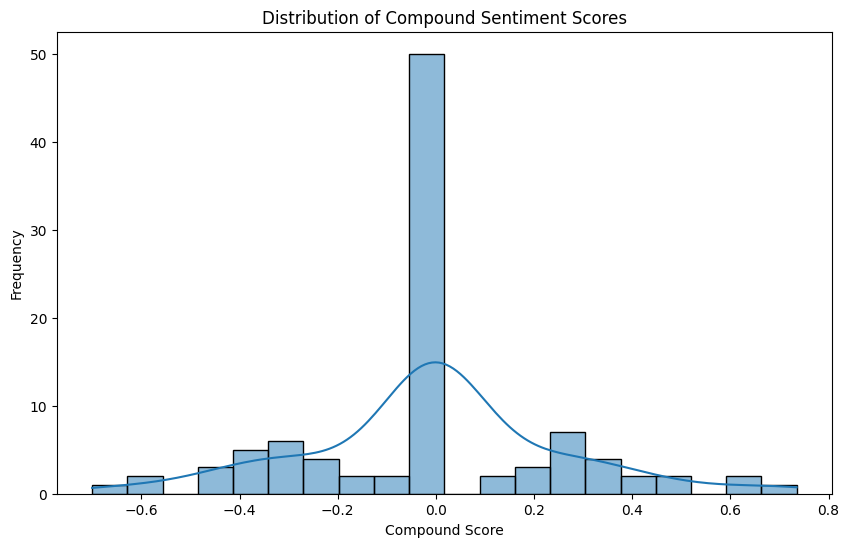

In [10]:

#this will show a distribution of the compound scores for

plt.figure(figsize=(10, 6))
sns.histplot(phdl['compound'], bins=20, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()



###Findings:

The distribution of compound scores shows majority of headlines are neutral (0.0), and the frequency of negative and positive sentiment scores are almost equivalent.



I want to do the same thing with the snippet column to compare.

In [12]:
#iterates through the snippet column and applies the sentiment analyzer
scores_snip = []

for x in df_new['snippet']:
  result = analyzer.polarity_scores(x)
  scores_snip.append(result)


In [13]:
scores_snip = pd.DataFrame(scores_snip)

In [ ]:
scores_snip.head()

,neg,neu,pos,compound
0,0.000,0.803,0.197,0.5994
1,0.077,0.829,0.094,0.1531
2,0.203,0.465,0.332,0.4660
3,0.230,0.706,0.064,-0.7506
4,0.000,0.838,0.162,0.4754


In [14]:
phdl_snip = df_new.join(scores_snip)

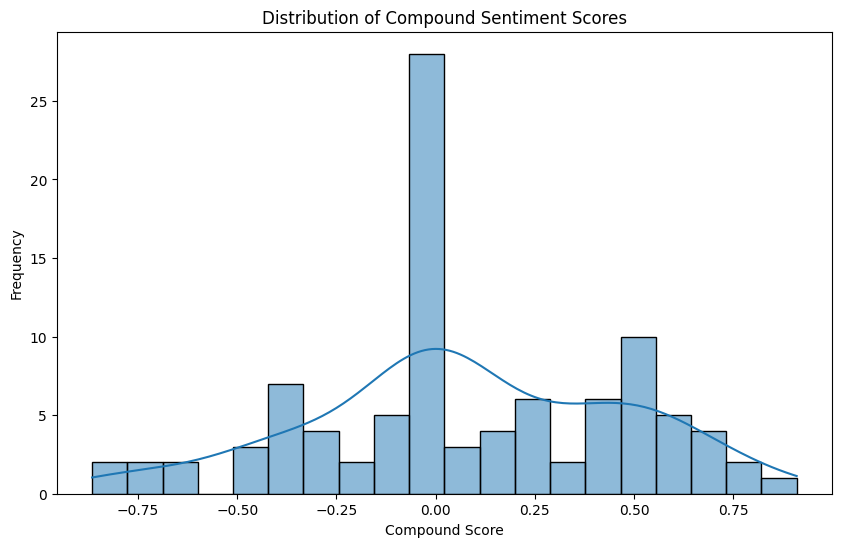

In [18]:

#distribution of compound scores of the snippet column
plt.figure(figsize=(10, 6))
sns.histplot(phdl_snip['compound'], bins=20, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()



### Compare the compound scores between the two

Density Plot

<ipython-input-17-720ff28e80e4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(phdl['compound'], label='Headlines', shade=True)
<ipython-input-17-720ff28e80e4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(phdl_snip['compound'], label='Snippets', shade=True)


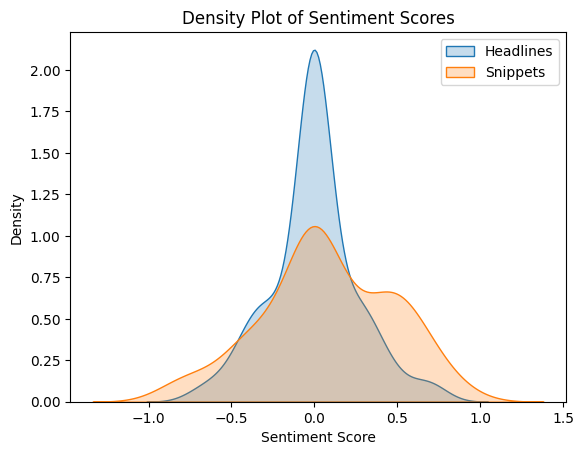

In [17]:
sns.kdeplot(phdl['compound'], label='Headlines', shade=True)
sns.kdeplot(phdl_snip['compound'], label='Snippets', shade=True)
plt.title('Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()


### Findings:

The distribution of scores between the print headline and the snippet shows some  differences. In the snippet distribution there seems to be more positive sentiment scores than negative sentiment scores.

The density plot shows a comparison between the snippets and headlines, it seems that snippet are more positive and the headlines.

### More comparisons

Bar Chart

In [19]:
#comparing the average mean the compound scores by the labels

import plotly.graph_objects as pltg

headline_scores_avg = phdl[['neg', 'neu', 'pos']].mean()
snippet_scores_avg = phdl_snip[['neg', 'neu', 'pos']].mean()

categories = ['Positive', 'Negative', 'Neutral']

fig = pltg.Figure(data=[
    pltg.Bar(name='Headlines', x=categories, y=headline_scores_avg),
    pltg.Bar(name='Snippets', x=categories, y=snippet_scores_avg)
])

fig.update_layout(barmode='group', title='Average Sentiment Analysis: Headlines vs. Snippets')
fig.show()


### Findings:

The compound scores gives a glimpse into the into the intensity of the sentence or snippet. So based on the bar chart it shows snippets are more intense in their negative sentiment than headlines. But headlines are more intense in their positive sentiment than snippets

### Conclusion:


This project can be improved greatly through a number of improvements. One being to allow the user to change the date, to seperate the keyword count by the month to see growing keywords over time, as well as improve the sentiment analysis by using it to compare it to ratings or interactions for articles, which is data we do not have right now.